In [38]:
from simulation import individual_simulation as sim_
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from reshape import Resize
from cost import compute_cost as cc_

In [25]:
ind = np.zeros((3, 100, 100))
ind[1, 30:70, 30:70] = 5
ind[1, 35:65, 35:65] = 10
ind[1, 40:60, 40:60] = 15
ind[1, 45:55, 45:55] = 20
ind[-1, -1, :5] = (1, 0, 5000, 5000, .1)
ind[-1, 0, :3] = (.5, .1, 1.9)

In [26]:
y_hat, d = sim_(ind)

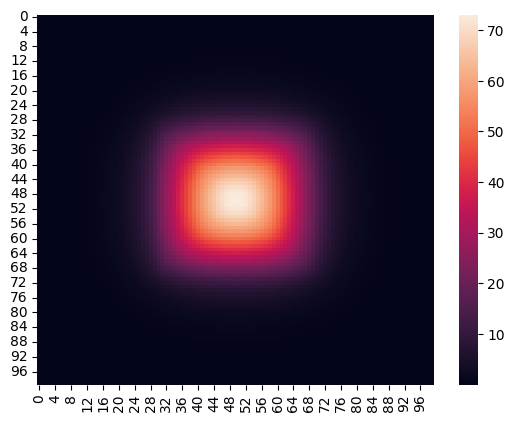

In [27]:
sns.heatmap(y_hat)
plt.show()

In [34]:
obj = Resize(order=1, mode="constant", cval=0.0, grid_mode=False)
zoomed = obj.zoom_in(target=y_hat, zoom_=.5)

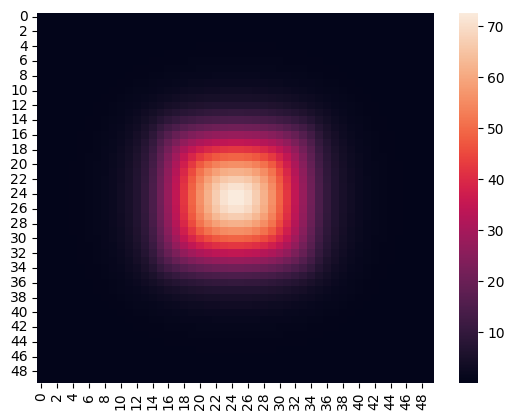

In [35]:
sns.heatmap(zoomed)
plt.show()

In [36]:
t = np.zeros((100, 100))
t[30:70, 30:70] =10

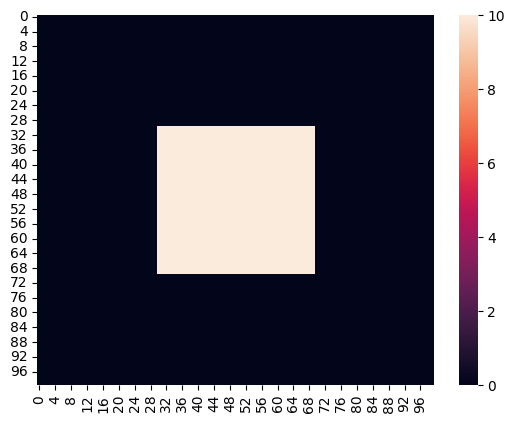

In [37]:
sns.heatmap(t)
plt.show()

In [39]:
obj = Resize(order=1, mode="constant", cval=0.0, grid_mode=False)
t_zoomed = obj.zoom_in(target=t, zoom_=.5)

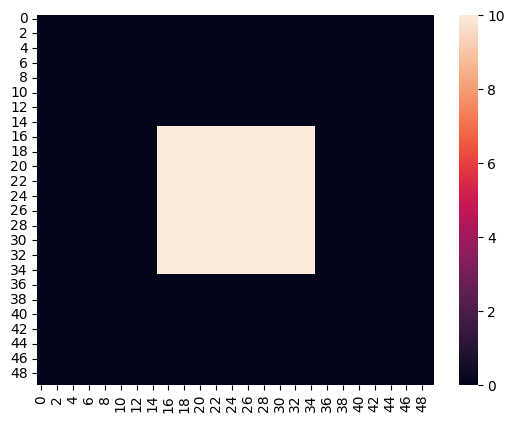

In [40]:
sns.heatmap(t_zoomed)
plt.show()

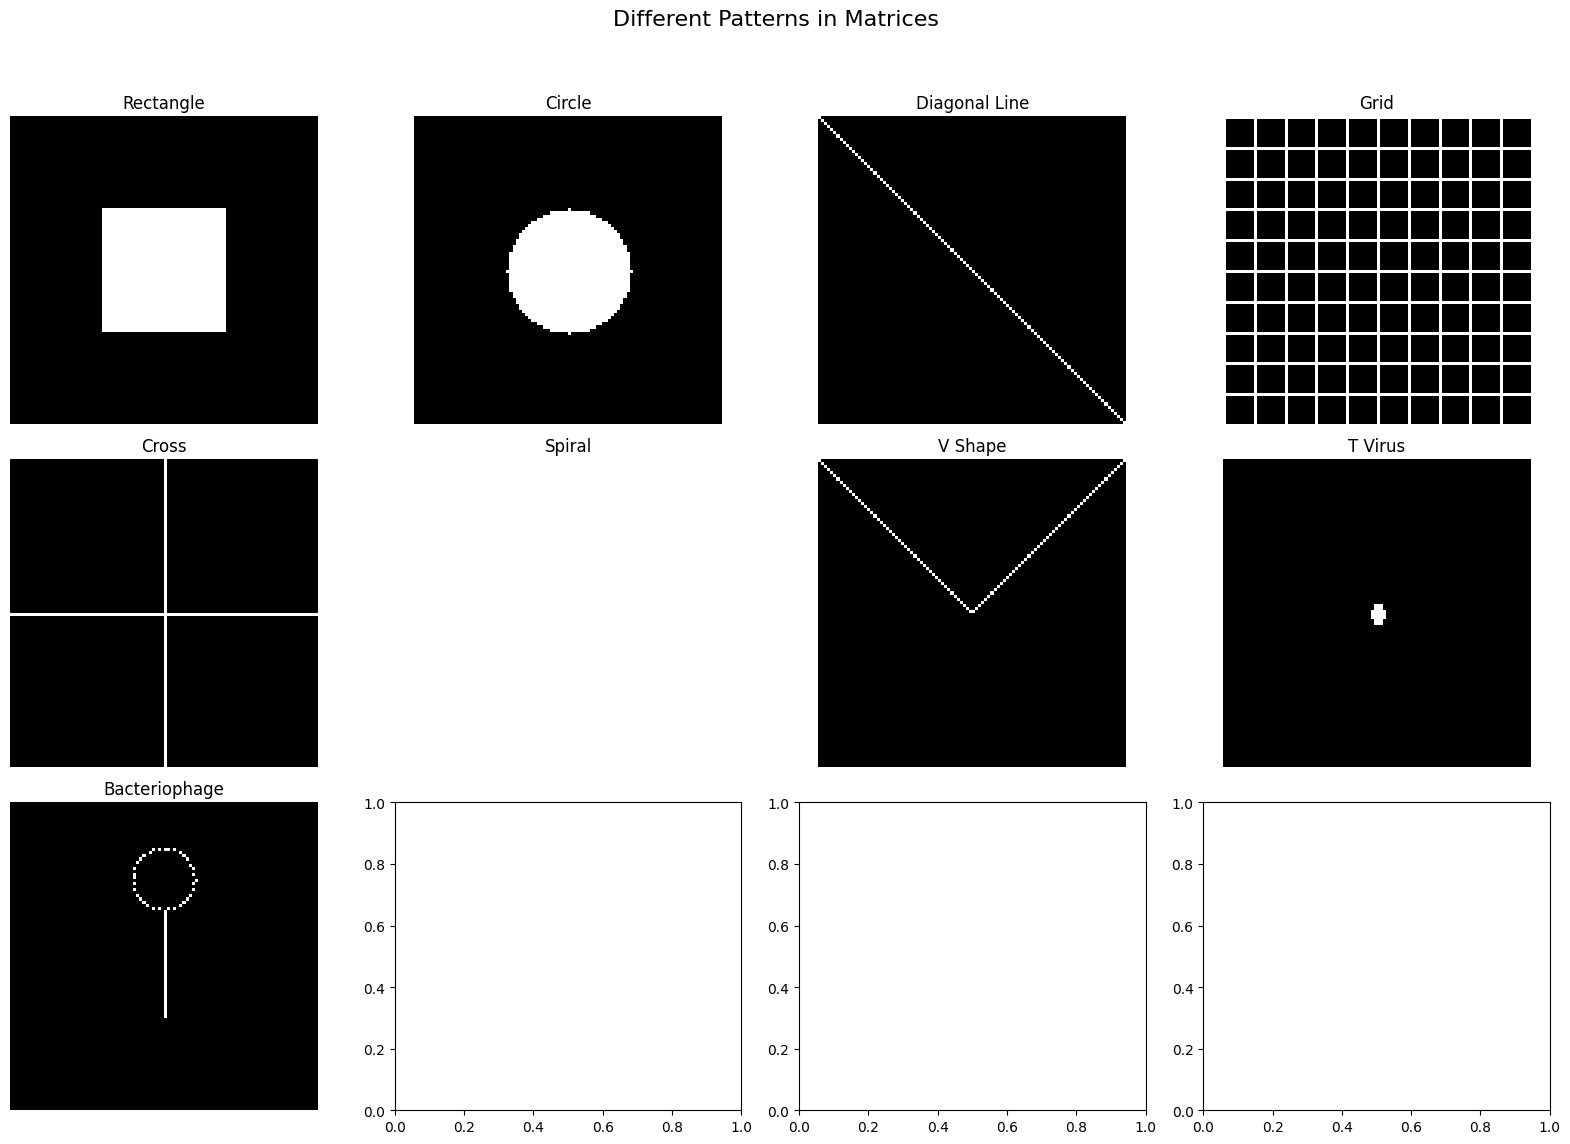

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def create_rectangle(matrix, value, start, end):
    """Fill a rectangle in the matrix with a specified value."""
    matrix[start[0]:end[0], start[1]:end[1]] = value

def create_circle(matrix, value, center, radius):
    """Fill a circle in the matrix with a specified value."""
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if (i - center[0])**2 + (j - center[1])**2 <= radius**2:
                matrix[i, j] = value

def create_diagonal_line(matrix, value):
    """Draw a diagonal line from the top-left to the bottom-right corner."""
    np.fill_diagonal(matrix, value)

def create_grid(matrix, value, step):
    """Fill a grid pattern in the matrix with a specified value."""
    matrix[::step, :] = value
    matrix[:, ::step] = value

def create_cross(matrix, value):
    """Draw a cross pattern in the matrix."""
    mid = matrix.shape[0] // 2
    matrix[mid, :] = value  # horizontal line
    matrix[:, mid] = value  # vertical line

def create_spiral(matrix, value):
    """Create a spiral pattern in the matrix."""
    n = matrix.shape[0]
    top, bottom, left, right = 0, n-1, 0, n-1
    while top <= bottom and left <= right:
        for i in range(left, right + 1):
            matrix[top, i] = value
        top += 1
        for i in range(top, bottom + 1):
            matrix[i, right] = value
        right -= 1
        if top <= bottom:
            for i in range(right, left - 1, -1):
                matrix[bottom, i] = value
            bottom -= 1
        if left <= right:
            for i in range(bottom, top - 1, -1):
                matrix[i, left] = value
            left += 1

def create_v_shape(matrix, value):
    """Create a 'V' shape in the matrix."""
    mid = matrix.shape[0] // 2
    for i in range(mid):
        matrix[i, i] = value
        matrix[i, matrix.shape[1] - 1 - i] = value

def create_t_virus(matrix, value):
    """Create a T-virus structure (simplified representation)."""
    center = matrix.shape[0] // 2
    matrix[center-1:center+2, center-2:center+3] = value  # T shape
    matrix[center-3:center+4, center-1:center+2] = value  # vertical part of T

def create_bacteriophage(matrix, value):
    """Create a simplified representation of a bacteriophage."""
    # Draw the hexagonal head
    hexagon_center = (25, 50)
    radius = 10
    for i in range(36):  # 36 points to make a hexagon
        angle = i * (np.pi / 18)  # 18 degrees per point
        x = int(hexagon_center[0] + radius * np.cos(angle))
        y = int(hexagon_center[1] + radius * np.sin(angle))
        if 0 <= x < matrix.shape[0] and 0 <= y < matrix.shape[1]:
            matrix[x, y] = value

    # Draw the tail
    tail_start = 35  # Starting row for the tail
    tail_end = 70    # Ending row for the tail
    matrix[tail_start:tail_end, 50] = value  # Vertical tail line

# Initialize the figure for plotting
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
fig.suptitle('Different Patterns in Matrices', fontsize=16)

# Create an array of different patterns
patterns = [
    ("Rectangle", (100, 100), create_rectangle, 10, [(30, 30), (70, 70)]),
    ("Circle", (100, 100), create_circle, 10, (50, 50), 20),
    ("Diagonal Line", (100, 100), create_diagonal_line, 10),
    ("Grid", (100, 100), create_grid, 10, 10),
    ("Cross", (100, 100), create_cross, 10),
    ("Spiral", (100, 100), create_spiral, 10),
    ("V Shape", (100, 100), create_v_shape, 10),
    ("T Virus", (100, 100), create_t_virus, 10),
    ("Bacteriophage", (100, 100), create_bacteriophage, 10)
]

# Generate and plot each pattern
for ax, (title, shape, func, *args) in zip(axs.flatten(), patterns):
    matrix = np.zeros(shape)
    if func == create_rectangle:
        func(matrix, args[0], args[1][0], args[1][1])  # Unpack start and end for rectangle
    elif func == create_circle:
        func(matrix, args[0], args[1], args[2])  # Unpack value, center, radius
    elif func == create_grid:
        func(matrix, args[0], args[1])  # Unpack value and step for grid
    else:
        func(matrix, args[0] if args else None)

    ax.imshow(matrix, cmap='gray', vmin=0, vmax=10)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

